# Importing all the required libraries 

In [380]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

pd.set_option("display.max_columns", 50)

# Importing data and reading it

In [381]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [382]:
lead.shape

(9240, 37)

In [383]:
lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [384]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [385]:
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [386]:
#checking the percentage of missing values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [387]:
# Drop all the columns in which missing values are greater than 3000

for col in lead.columns:
    if lead[col].isnull().sum() > 3000:
        lead.drop(col, 1, inplace=True)

/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/3805030597.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(col, 1, inplace=True)
/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/3805030597.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(col, 1, inplace=True)
/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/3805030597.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(col, 1, inplace=True)
/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/3805030597.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(col, 1, inplace=True)
/var/folders

In [388]:
#checking the missing values in each column

lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [389]:
# lets check which columns have the select 

for column in lead:
    print(lead[column].value_counts())
    print('######################')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
######################
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
######################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
######################
Google               2868
Direct Traffic       2543
O

### so from here we can see that there are 3 cols having select as values so we can drop those 
### also according to the question city,country,prospect id and lead number is of also less relevance to us in our problem

In [390]:
lead.drop(['Lead Profile', 'How did you hear about X Education','Country','City','Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [391]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

### we will also drop the rows Containing majorly one value such as Do Not Call,Search,Magazine etc. since they wont be of use and might hinder the analysis

In [392]:
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

## now checking the final data set and null value 

In [393]:
lead.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### Removing only nulls in descending order

In [394]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]
lead.isnull().sum().sort_values(ascending = False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [395]:
lead = lead[~pd.isnull(lead['TotalVisits'])]
lead.isnull().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [396]:
lead = lead[~pd.isnull(lead['Lead Source'])]
lead.isnull().sum().sort_values(ascending = False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [397]:
lead = lead[~pd.isnull(lead['Specialization'])]
lead.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## Final dataset with no null vales

In [398]:
lead.head()
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

#### we can see that from the orignal set of 9240 rows we have retained 6373 roughly about 70% 

## we can plot a heatmap to see the correlation of variables in our dataset

/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/2643650871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lead.corr())


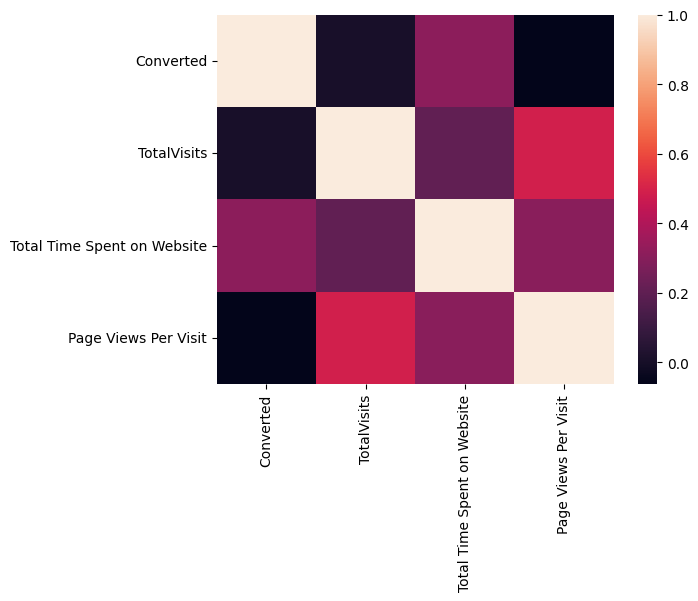

In [399]:
sns.heatmap(lead.corr())
plt.show()

## from this heat map we can make a crude observation that total time spent on website has a positive correlation with the convertied clients.

# Model building

## 1. We need to create dummy variables for the columns having categorical variables

In [400]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity','Specialization']], drop_first=True)
lead = pd.concat([lead, dummy], axis=1)

In [401]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### from observing the data we can see that we have a row in Specialization with depicts the select option as select is Basically a null so we can drop it

In [402]:
lead = lead.drop(['Specialization_Select'], axis=1)

In [403]:
# Dropping the variables for which the dummy variables have been created

lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity','Specialization'], axis = 1)

# Test-Train Split
### The next step is to split the dataset into training an testing sets.

In [404]:
# create x and y
#target variable in y
y = lead['Converted']
# rest in x
X = lead.drop(['Converted'], 1)

/var/folders/_p/1z9lv5_15jb2lnbf46gsc6xc0000gn/T/ipykernel_6083/2756140313.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = lead.drop(['Converted'], 1)


### Split the dataset into 70% train and 30% test

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

### there are numeric variables present in the dataset which have different scales. So we need to scale these variables for optimal result

In [406]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

# Model Building
### Let's build the model now. As we can see that there are a lot of variables present in the dataset So the best approach is to use RFE.

In [407]:
reg = LogisticRegression()

In [408]:
rfe = RFE(reg)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 17),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 7),
 ('Lead Source_testone', False, 15),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', Fa

In [409]:
# Put all the columns selected by RFE in a variable 

g = X_train.columns[rfe.support_]

In [410]:
X_train = X_train[g]

### Now that we have the variables selected by RFE. to get the the p-values and the VIFs, let's to create a  model using statsmodels.

In [411]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.3
Date:                Sun, 26 Feb 2023   Deviance:                       3968.6
Time:                        09:34:18   Pearson chi2:                 4.60e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1343      0.658      0.204      0.838      -1.155       1.423
TotalVisits                                             13.6829      3.427      3.992      0.000       6.966      20.400
Total Time Spent on Website                              4.4052      0.189     23.281      0.000       4.034       4.776
Page Views Per Visit                                    -1.5395      0.467     -3.295      0.001      -2.455      -0.624
Lead Origin_Landing Page Submission                     -0.2375      0.115     -2.058      0.040      -0.464      -0.011
Lead Origin_Lead Add Form                                2.2260      1.194      1.864      0.062      -0.114       4.566
Lead Source_Direct Traffic                              -0.4539      0.104     -4.384      0.000      -0.657      -0.251
Lead Source_Olark Chat                                   1.0463      0.155      6.748      0.000       0.742       1.350
Lead Source_Reference                                    1.4278      1.214      1.176      0.240      -0.952       3.808
Lead Source_Welingak Website                             3.5677      1.559      2.289      0.022       0.513       6.623
Do Not Email_Yes                                        -1.3865      0.233     -5.951      0.000      -1.843      -0.930
Last Activity_Converted to Lead                         -0.3565      0.266     -1.340      0.180      -0.878       0.165
Last Activity_Email Bounced                             -1.1256      0.684     -1.647      0.100      -2.465       0.214
Last Activity_Email Opened                               0.4125      0.214      1.926      0.054      -0.007       0.832
Last Activity_Had a Phone Conversation                   1.4843      1.013      1.465      0.143      -0.501       3.470
Last Activity_Olark Chat Conversation                   -0.6829      0.258     -2.648      0.008      -1.188      -0.178
Last Activity_SMS Sent                                   0.7119      0.219      3.246      0.001       0.282       1.142
What is your current occupation_Housewife               22.4342   2.42e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                 -1.0859      0.648     -1.675      0.094      -2.357       0.185
What is your current occupation_Unemployed              -1.3355      0.610     -2.191      0.028      -2.530      -0.141
What is your current occupation_Working Professional     1.2611      0.639      1.973      0.049       0.008       2.514
Last Notable Activity_Email Bounced                      1.0665      0.825      1.292      0.196      -0.551       2.684
Last Notable Activity_Email Link Clicked                -0

In [412]:
#checking vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.68
7,Lead Source_Reference,65.37
18,What is your current occupation_Unemployed,32.82
8,Lead Source_Welingak Website,20.08
22,Last Notable Activity_Email Opened,12.33
12,Last Activity_Email Opened,11.42
15,Last Activity_SMS Sent,9.42
24,Last Notable Activity_Modified,6.04
3,Lead Origin_Landing Page Submission,5.08
19,What is your current occupation_Working Profes...,4.99


### all VIFs seem to be in a good range except for top 6.Let's drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [413]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [414]:
# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.9
Date:                Sun, 26 Feb 2023   Deviance:                       3969.7
Time:                        09:34:18   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1316      0.657      0.200      0.841      -1.157       1.420
TotalVisits                                             13.6769      3.427      3.991      0.000       6.960      20.394
Total Time Spent on Website                              4.4047      0.189     23.276      0.000       4.034       4.776
Page Views Per Visit                                    -1.5398      0.467     -3.296      0.001      -2.455      -0.624
Lead Origin_Landing Page Submission                     -0.2377      0.115     -2.060      0.039      -0.464      -0.012
Lead Origin_Lead Add Form                                3.6107      0.279     12.962      0.000       3.065       4.157
Lead Source_Direct Traffic                              -0.4537      0.104     -4.382      0.000      -0.657      -0.251
Lead Source_Olark Chat                                   1.0459      0.155      6.744      0.000       0.742       1.350
Lead Source_Welingak Website                             2.1817      1.038      2.101      0.036       0.147       4.217
Do Not Email_Yes                                        -1.3835      0.233     -5.944      0.000      -1.840      -0.927
Last Activity_Converted to Lead                         -0.3577      0.266     -1.344      0.179      -0.879       0.164
Last Activity_Email Bounced                             -1.1294      0.684     -1.652      0.098      -2.469       0.210
Last Activity_Email Opened                               0.4084      0.214      1.907      0.056      -0.011       0.828
Last Activity_Had a Phone Conversation                   1.4834      1.013      1.464      0.143      -0.502       3.469
Last Activity_Olark Chat Conversation                   -0.6835      0.258     -2.651      0.008      -1.189      -0.178
Last Activity_SMS Sent                                   0.7139      0.219      3.257      0.001       0.284       1.143
What is your current occupation_Housewife               22.4371   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                 -1.0845      0.648     -1.673      0.094      -2.355       0.186
What is your current occupation_Unemployed              -1.3350      0.609     -2.190      0.029      -2.530      -0.140
What is your current occupation_Working Professional     1.2627      0.639      1.976      0.048       0.010       2.515
Last Notable Activity_Email Bounced                      1.0700      0.825      1.297      0.195      -0.547       2.687
Last Notable Activity_Email Link Clicked                -0.8761      0.358     -2.451      0.014      -1.577      -0.175
Last Notable Activity_Email Opened                      -0

In [415]:
#calculating vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,32.82
21,Last Notable Activity_Email Opened,12.32
11,Last Activity_Email Opened,11.42
14,Last Activity_SMS Sent,9.42
23,Last Notable Activity_Modified,6.04
3,Lead Origin_Landing Page Submission,5.08
18,What is your current occupation_Working Profes...,4.99
2,Page Views Per Visit,4.86
12,Last Activity_Had a Phone Conversation,2.49
22,Last Notable Activity_Had a Phone Conversation,2.48


In [416]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [417]:
# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.4
Date:                Sun, 26 Feb 2023   Deviance:                       3974.8
Time:                        09:34:19   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1930      0.263     -4.533      0.000      -1.709      -0.677
TotalVisits                                             14.0574      3.441      4.086      0.000       7.314      20.801
Total Time Spent on Website                              4.4054      0.189     23.290      0.000       4.035       4.776
Page Views Per Visit                                    -1.5174      0.467     -3.249      0.001      -2.433      -0.602
Lead Origin_Landing Page Submission                     -0.2454      0.115     -2.128      0.033      -0.471      -0.019
Lead Origin_Lead Add Form                                3.6180      0.278     12.993      0.000       3.072       4.164
Lead Source_Direct Traffic                              -0.4437      0.103     -4.296      0.000      -0.646      -0.241
Lead Source_Olark Chat                                   1.0522      0.155      6.788      0.000       0.748       1.356
Lead Source_Welingak Website                             2.1775      1.038      2.097      0.036       0.143       4.212
Do Not Email_Yes                                        -1.3772      0.233     -5.921      0.000      -1.833      -0.921
Last Activity_Converted to Lead                         -0.3773      0.266     -1.420      0.156      -0.898       0.144
Last Activity_Email Bounced                             -1.1540      0.683     -1.689      0.091      -2.493       0.185
Last Activity_Email Opened                               0.3872      0.214      1.812      0.070      -0.032       0.806
Last Activity_Had a Phone Conversation                   1.4576      1.013      1.439      0.150      -0.527       3.442
Last Activity_Olark Chat Conversation                   -0.7059      0.257     -2.742      0.006      -1.211      -0.201
Last Activity_SMS Sent                                   0.6931      0.219      3.169      0.002       0.264       1.122
What is your current occupation_Housewife               23.7664   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                  0.2440      0.228      1.070      0.285      -0.203       0.691
What is your current occupation_Working Professional     2.5912      0.201     12.875      0.000       2.197       2.986
Last Notable Activity_Email Bounced                      1.0691      0.825      1.296      0.195      -0.548       2.686
Last Notable Activity_Email Link Clicked                -0.8988      0.357     -2.517      0.012      -1.599      -0.199
Last Notable Activity_Email Opened                      -0.7316      0.242     -3.027      0.002      -1.205      -0.258
Last Notable Activity_Had a Phone Conversation          22

In [418]:
#calculating vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Opened,9.95
20,Last Notable Activity_Email Opened,9.82
3,Lead Origin_Landing Page Submission,4.87
2,Page Views Per Visit,4.56
22,Last Notable Activity_Modified,3.53
14,Last Activity_SMS Sent,3.29
12,Last Activity_Had a Phone Conversation,2.47
21,Last Notable Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.35
4,Lead Origin_Lead Add Form,2.19


In [419]:
X_train.drop('Last Activity_Email Opened', axis = 1, inplace = True)

In [420]:
# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1989.0
Date:                Sun, 26 Feb 2023   Deviance:                       3978.1
Time:                        09:34:19   Pearson chi2:                 4.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0043      0.240     -4.187      0.000      -1.474      -0.534
TotalVisits                                             13.8896      3.419      4.062      0.000       7.188      20.591
Total Time Spent on Website                              4.4022      0.189     23.299      0.000       4.032       4.773
Page Views Per Visit                                    -1.5211      0.466     -3.267      0.001      -2.434      -0.608
Lead Origin_Landing Page Submission                     -0.2527      0.115     -2.195      0.028      -0.478      -0.027
Lead Origin_Lead Add Form                                3.6358      0.279     13.055      0.000       3.090       4.182
Lead Source_Direct Traffic                              -0.4347      0.103     -4.218      0.000      -0.637      -0.233
Lead Source_Olark Chat                                   1.0568      0.155      6.815      0.000       0.753       1.361
Lead Source_Welingak Website                             2.1576      1.038      2.078      0.038       0.123       4.193
Do Not Email_Yes                                        -1.4248      0.231     -6.174      0.000      -1.877      -0.973
Last Activity_Converted to Lead                         -0.5773      0.240     -2.401      0.016      -1.049      -0.106
Last Activity_Email Bounced                             -1.3182      0.676     -1.949      0.051      -2.644       0.008
Last Activity_Had a Phone Conversation                   1.2585      1.006      1.251      0.211      -0.713       3.230
Last Activity_Olark Chat Conversation                   -0.9101      0.230     -3.953      0.000      -1.361      -0.459
Last Activity_SMS Sent                                   0.5100      0.192      2.654      0.008       0.133       0.887
What is your current occupation_Housewife               23.7614   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                  0.2454      0.228      1.077      0.282      -0.201       0.692
What is your current occupation_Working Professional     2.5955      0.201     12.894      0.000       2.201       2.990
Last Notable Activity_Email Bounced                      1.0965      0.825      1.330      0.184      -0.520       2.713
Last Notable Activity_Email Link Clicked                -1.0833      0.341     -3.172      0.002      -1.752      -0.414
Last Notable Activity_Email Opened                      -0.5275      0.215     -2.459      0.014      -0.948      -0.107
Last Notable Activity_Had a Phone Conversation          22.1821   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Last Notable Activity_Modified                          -1

In [421]:
#calculating vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.87
2,Page Views Per Visit,4.52
19,Last Notable Activity_Email Opened,3.21
13,Last Activity_SMS Sent,3.09
21,Last Notable Activity_Modified,2.84
20,Last Notable Activity_Had a Phone Conversation,2.46
11,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.33
4,Lead Origin_Lead Add Form,2.15
10,Last Activity_Email Bounced,2.07


## now that all vif are below 5 lets drop the high p values

In [422]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [423]:
# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4428
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.0
Date:                Sun, 26 Feb 2023   Deviance:                       3990.0
Time:                        09:34:20   Pearson chi2:                 4.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9828      0.239     -4.104      0.000      -1.452      -0.513
TotalVisits                                             13.7334      3.406      4.032      0.000       7.057      20.409
Total Time Spent on Website                              4.3998      0.189     23.319      0.000       4.030       4.770
Page Views Per Visit                                    -1.5535      0.465     -3.340      0.001      -2.465      -0.642
Lead Origin_Landing Page Submission                     -0.2384      0.115     -2.075      0.038      -0.464      -0.013
Lead Origin_Lead Add Form                                3.6390      0.278     13.079      0.000       3.094       4.184
Lead Source_Direct Traffic                              -0.4448      0.103     -4.324      0.000      -0.646      -0.243
Lead Source_Olark Chat                                   1.0460      0.155      6.755      0.000       0.743       1.350
Lead Source_Welingak Website                             2.1443      1.038      2.065      0.039       0.109       4.179
Do Not Email_Yes                                        -1.4299      0.231     -6.198      0.000      -1.882      -0.978
Last Activity_Converted to Lead                         -0.5968      0.240     -2.485      0.013      -1.067      -0.126
Last Activity_Email Bounced                             -1.3331      0.676     -1.971      0.049      -2.659      -0.008
Last Activity_Had a Phone Conversation                   1.2437      1.006      1.236      0.216      -0.728       3.215
Last Activity_Olark Chat Conversation                   -0.9214      0.230     -4.005      0.000      -1.372      -0.471
Last Activity_SMS Sent                                   0.4947      0.192      2.578      0.010       0.119       0.871
What is your current occupation_Student                  0.2388      0.228      1.048      0.295      -0.208       0.685
What is your current occupation_Working Professional     2.5885      0.201     12.863      0.000       2.194       2.983
Last Notable Activity_Email Bounced                      1.1033      0.825      1.338      0.181      -0.513       2.719
Last Notable Activity_Email Link Clicked                -1.0879      0.340     -3.197      0.001      -1.755      -0.421
Last Notable Activity_Email Opened                      -0.5345      0.214     -2.495      0.013      -0.955      -0.115
Last Notable Activity_Had a Phone Conversation          21.1813   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Notable Activity_Modified                          -1.0703      0.181     -5.916      0.000      -1.425      -0.716
Last Notable Activity_Olark Chat Conversation           -0

In [424]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [425]:
# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1996.7
Date:                Sun, 26 Feb 2023   Deviance:                       3993.3
Time:                        09:34:35   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9544      0.239     -3.997      0.000      -1.422      -0.486
TotalVisits                                             13.8183      3.404      4.059      0.000       7.146      20.490
Total Time Spent on Website                              4.3946      0.189     23.299      0.000       4.025       4.764
Page Views Per Visit                                    -1.5533      0.465     -3.343      0.001      -2.464      -0.643
Lead Origin_Landing Page Submission                     -0.2350      0.115     -2.047      0.041      -0.460      -0.010
Lead Origin_Lead Add Form                                3.6439      0.278     13.093      0.000       3.098       4.189
Lead Source_Direct Traffic                              -0.4473      0.103     -4.353      0.000      -0.649      -0.246
Lead Source_Olark Chat                                   1.0473      0.155      6.762      0.000       0.744       1.351
Lead Source_Welingak Website                             2.1463      1.038      2.067      0.039       0.111       4.182
Do Not Email_Yes                                        -1.4357      0.231     -6.223      0.000      -1.888      -0.984
Last Activity_Converted to Lead                         -0.5944      0.240     -2.476      0.013      -1.065      -0.124
Last Activity_Email Bounced                             -1.3269      0.676     -1.962      0.050      -2.652      -0.001
Last Activity_Had a Phone Conversation                   2.3487      0.831      2.827      0.005       0.720       3.977
Last Activity_Olark Chat Conversation                   -0.9196      0.230     -3.998      0.000      -1.370      -0.469
Last Activity_SMS Sent                                   0.4696      0.191      2.455      0.014       0.095       0.845
What is your current occupation_Student                  0.2389      0.228      1.049      0.294      -0.208       0.686
What is your current occupation_Working Professional     2.5860      0.201     12.847      0.000       2.191       2.981
Last Notable Activity_Email Bounced                      1.0736      0.824      1.302      0.193      -0.542       2.689
Last Notable Activity_Email Link Clicked                -1.1183      0.340     -3.291      0.001      -1.784      -0.452
Last Notable Activity_Email Opened                      -0.5646      0.214     -2.645      0.008      -0.983      -0.146
Last Notable Activity_Modified                          -1.1013      0.180     -6.118      0.000      -1.454      -0.749
Last Notable Activity_Olark Chat Conversation           -0.5266      0.456     -1.154      0.248      -1.421       0.368
Last Notable Activity_Page Visited on Website           -0

X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Last Notable Activity_Olark Chat Conversation', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_E-Business', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_E-COMMERCE', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_Finance Management', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_Healthcare Management', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_Rural and Agribusiness', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Specialization_Supply Chain Management', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

# Refitting the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()